# Exploring Mushrooms

When asked to think of a mushroom, you might imagine the following:

![this shows a photo of some generic button mushrooms in a forest.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/generic_mushroom.jpg)

It's a beige, convex mushroom top with a uniform, thick stem. Maybe you thought of it cut up on a slice of delicious pizza or braised with sauce over rice. Regardless, you most likely did not consider this:

![A photo of some beautiful mushrooms in a forest. They do not have the signature "mushroom top" and have visually appealing grooves that make them look almost like floral.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/pretty_mushroom.jpg)

Mushrooms exist in a variety of different colors, shapes, sizes, textures, etc. In this project, you will analyze an extensive mushroom dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) using bar charts and acquaint yourself with the diverse array of mushrooms that exist worldwide.

## Looking Over the Data

1. Take a look at the code block below where we've loaded **mushroom_data.csv**. It contains 23 columns of data describing thousands of mushrooms. In the output below the code block, data about five different mushrooms is shown.

   Read through this table to get a sense of the type(s) of variables in the data and the structure of the table. It may also be helpful to read through the information on [Kaggle](https://www.kaggle.com/uciml/mushroom-classification).
   
   Before you move on to plotting any of this data, answer the following questions:
   * What type(s) of variables does **mushroom_data.csv** contain?
   * How many of the variables can we visualize effectively with a bar graph?
   
   View **Exploring Mushrooms_Solution.ipynb** to see our answers.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# load in the data
df = pd.read_csv("mushroom_data.csv")
df.head()

,Class,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Gray,False,NaN,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap Shape                 8124 non-null   object
 2   Cap Surface               8124 non-null   object
 3   Cap Color                 8124 non-null   object
 4   Bruises                   8124 non-null   bool  
 5   Odor                      4596 non-null   object
 6   Gill Attachment           8124 non-null   object
 7   Gill Spacing              8124 non-null   object
 8   Gill Size                 8124 non-null   object
 9   Gill Color                8124 non-null   object
 10  Stalk Shape               8124 non-null   object
 11  Stalk Root                8124 non-null   object
 12  Stalk Surface Above Ring  8124 non-null   object
 13  Stalk Surface Below Ring  8124 non-null   object
 14  Stalk Color Above Ring  

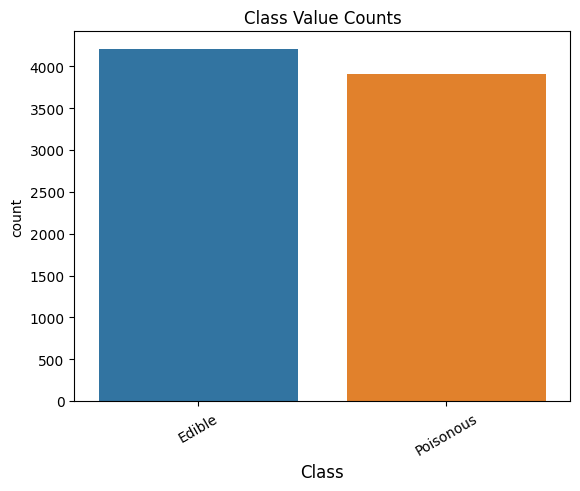

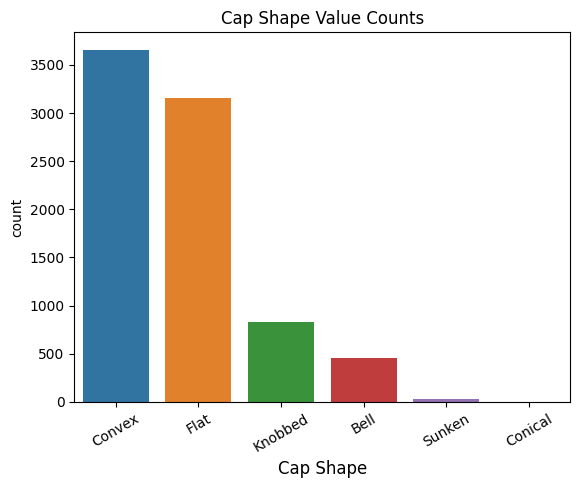

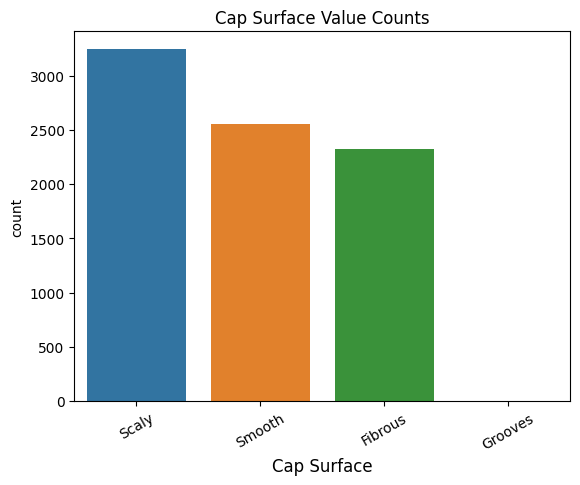

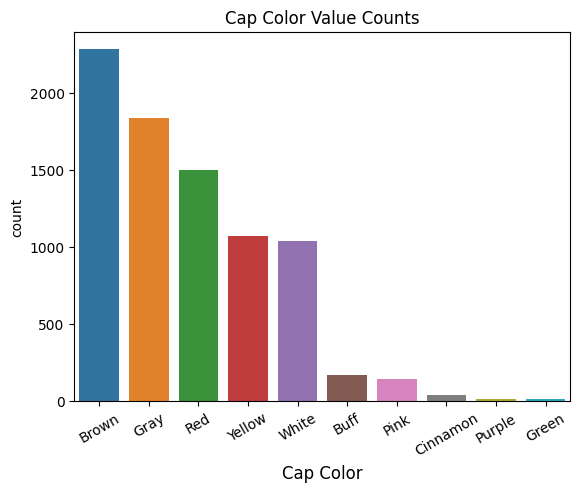

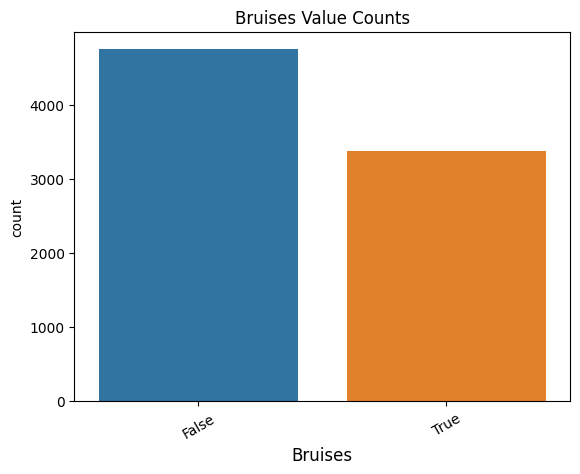

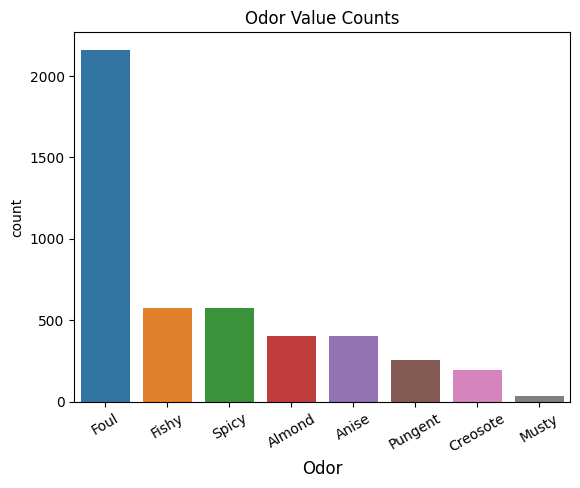

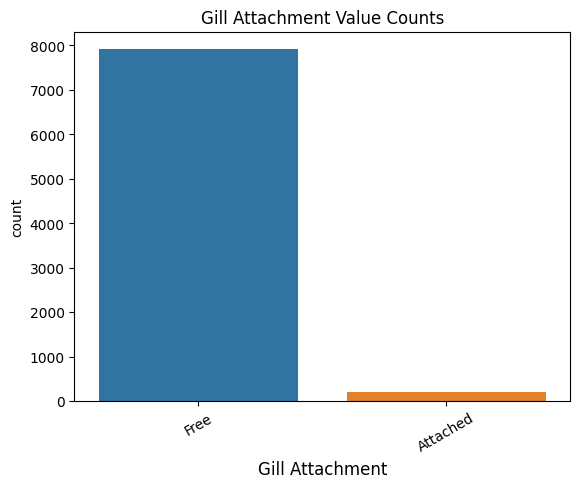

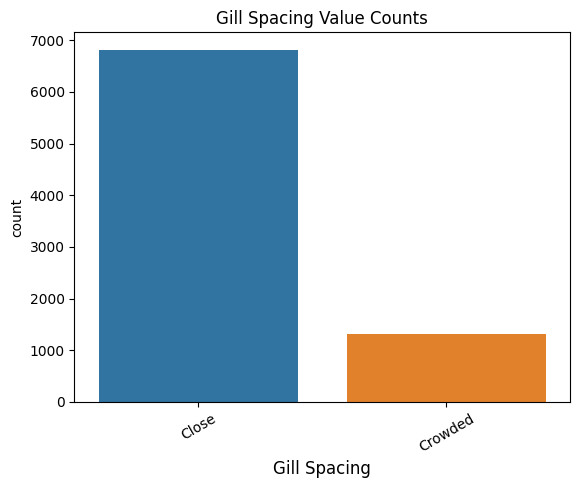

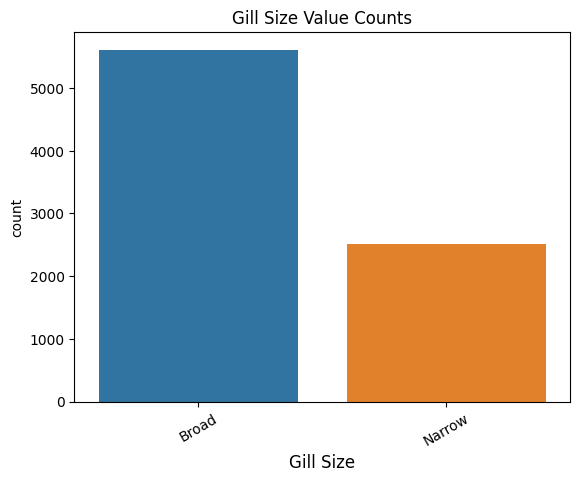

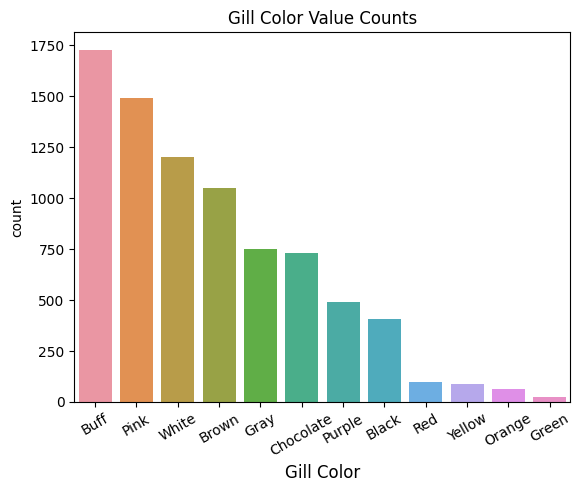

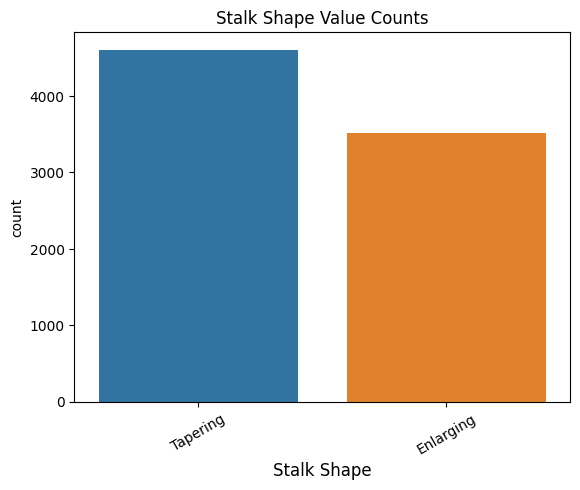

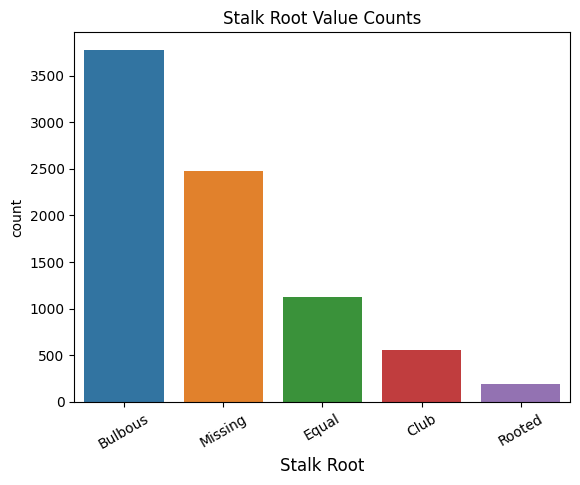

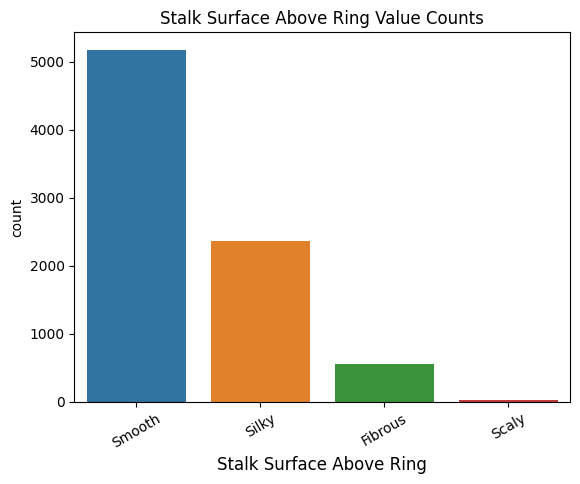

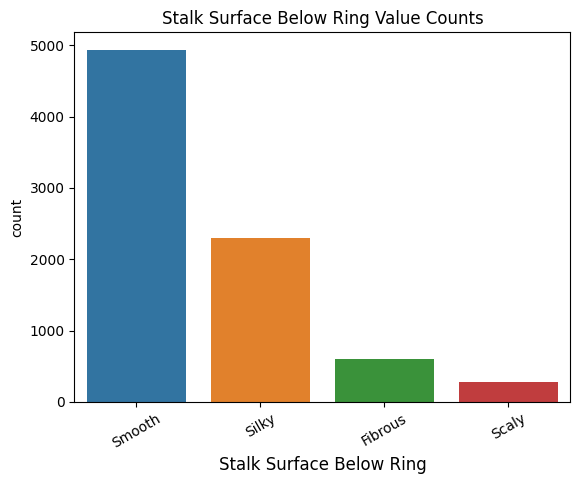

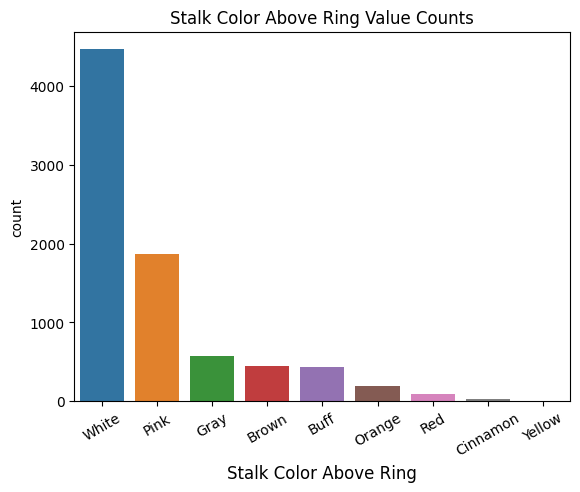

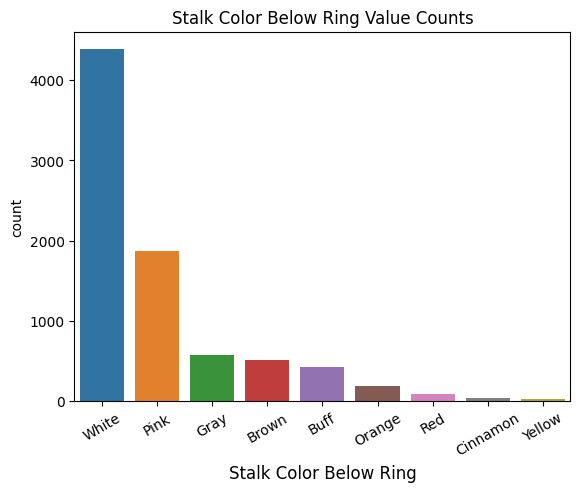

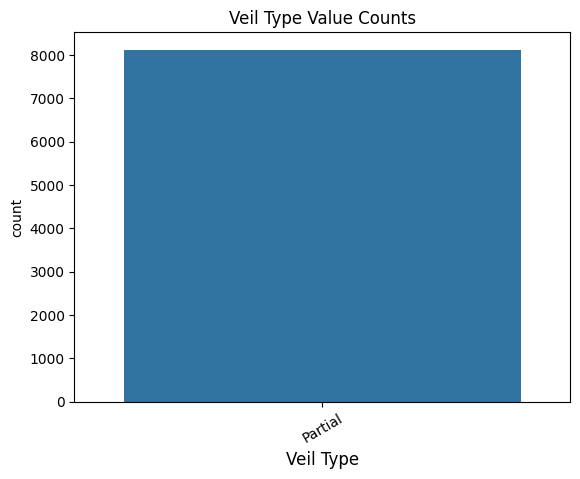

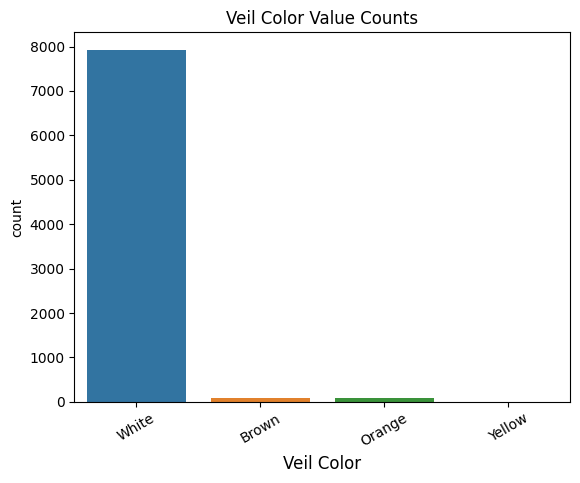

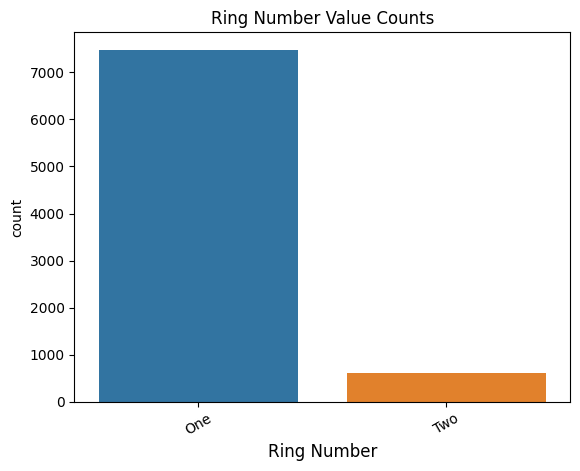

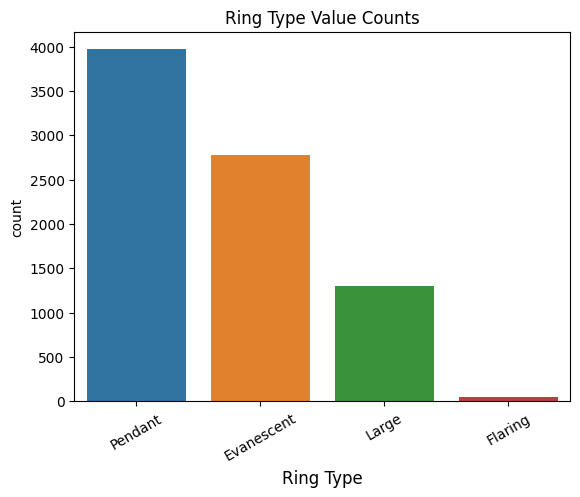

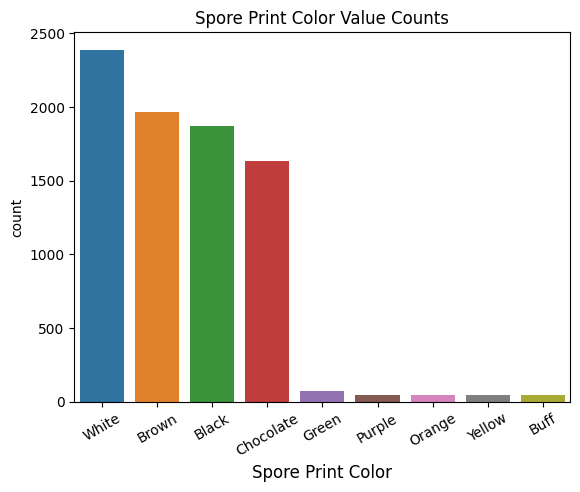

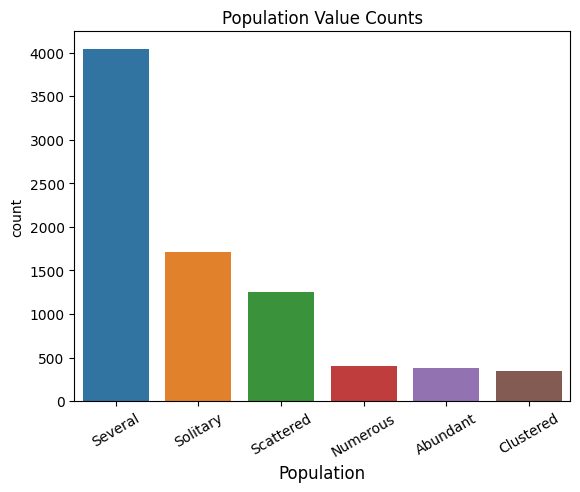

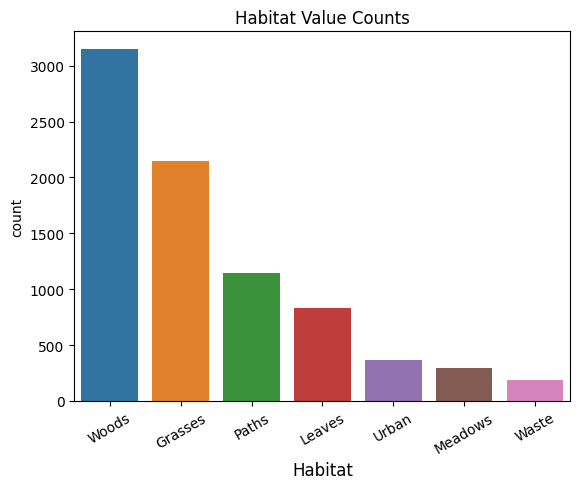

<Figure size 640x480 with 0 Axes>

In [11]:
# list of all column headers
columns = df.columns.tolist()
for column in columns:
    #print(column)
    sns.countplot(x=column, data=df, order = df[column].value_counts().index)
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.title(f'{column} Value Counts')
    plt.show()
    plt.clf()



Accuracy: 0.9120
Precision: 0.8454


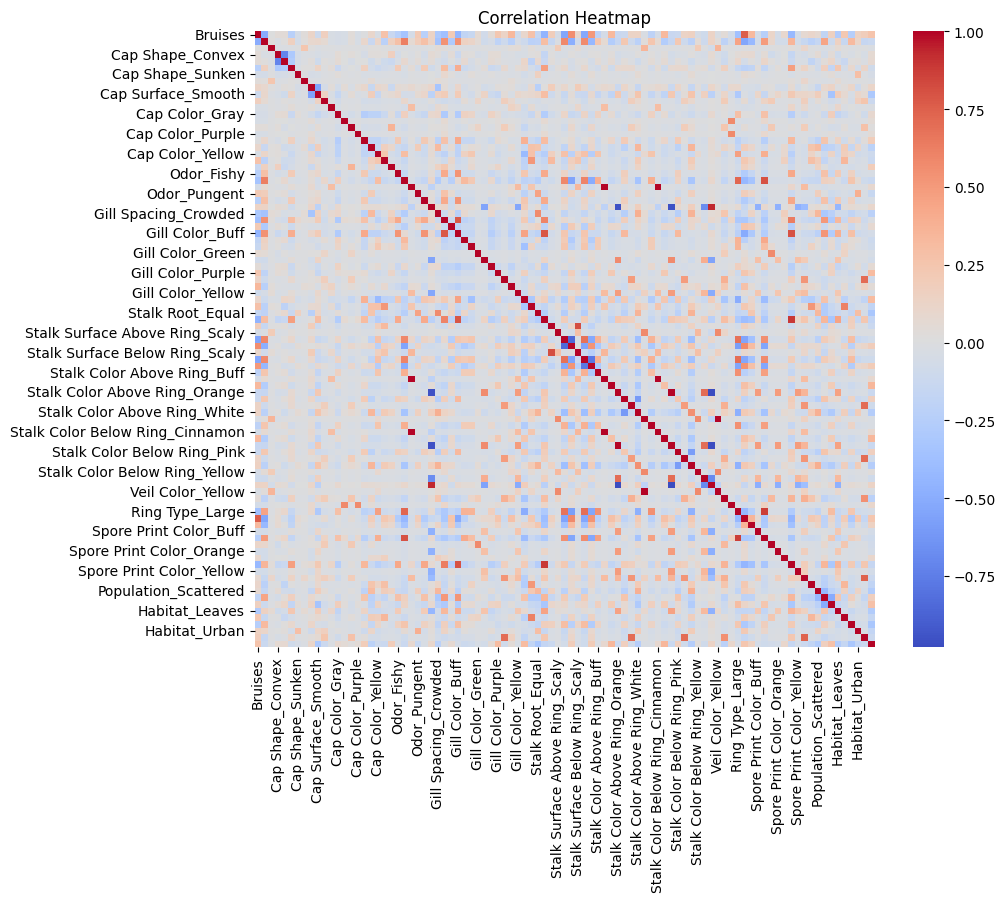

In [13]:

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('Class_Poisonous', axis=1)
y = df['Class_Poisonous']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


## 10 Most informative features

In [16]:
# Get the feature probabilities for each class
feature_probs = nb_classifier.theta_

# Calculate the absolute difference in feature probabilities between classes
diff_probs = abs(feature_probs[0] - feature_probs[1])

# Get the indices of the top 10 most informative features
top_10_informative_feature_indices = diff_probs.argsort()[::-1][:10]

# Get the column names of the top 10 most informative features
top_10_informative_features = X.columns[top_10_informative_feature_indices]

print("Top 10 Most Informative Features:")
for feature in top_10_informative_features:
    print(feature)

Top 10 Most Informative Features:
Odor_Foul
Stalk Surface Above Ring_Silky
Ring Type_Pendant
Stalk Surface Below Ring_Silky
Gill Size_Narrow
Bruises
Stalk Surface Above Ring_Smooth
Population_Several
Gill Color_Buff
Stalk Surface Below Ring_Smooth
